Ứng dụng phân tích doanh số bán hàng với

Task 1 : đọc file csv từ máy tin : Done !!!

In [48]:
import pandas as pd
import os 

In [49]:
path = r"C:\Users\asus\Desktop\2019\\"
dataframe = pd.read_csv(path + 'sales2019_5.csv')
dataframe.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
5,194100,iPhone,1,700.0,05/10/19 19:44,"81 Jefferson St, San Francisco, CA 94016"
6,194101,USB-C Charging Cable,1,11.95,05/11/19 22:44,"354 Meadow St, Boston, MA 02215"
7,194102,Lightning Charging Cable,1,14.95,05/07/19 12:49,"166 4th St, Dallas, TX 75001"
8,194103,27in FHD Monitor,1,149.99,05/24/19 18:28,"759 Pine St, Seattle, WA 98101"
9,194104,Wired Headphones,1,11.99,05/04/19 18:38,"330 1st St, Seattle, WA 98101"


Task 2 : Dọn dẹp và tiền xử lý dữ liệu 

Task 2.1 : gôp tất cả dữ liệu của 12 file csv thành một file dữ liệu csv duy nhất 

Gán filepath bằng đường dẫn tệp CSV.

Đọc tệp CSV vào df1.

Thêm df1 vào danh sách frames.

Gộp tất cả các DataFrame trong frames thành result.

Lấy số dòng của df1 và lưu vào all_length.

Gán result vào df để chứa toàn bộ dữ liệu từ các tệp CSV.

In [50]:
frames = []
all_length = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = os.path.join(path, file)
        
        # Đọc file và xử lý tiêu đề lặp
        df_temp = pd.read_csv(filepath)
        
        # Lọc bỏ các dòng có giá trị trùng với tên cột đầu tiên
        first_column = df_temp.columns[0]
        df_temp = df_temp[~df_temp[first_column].astype(str).str.contains(first_column, na=False)]
        
        frames.append(df_temp)
        all_length.append(len(df_temp))  # Lưu số dòng sau khi đã làm sạch

# Gộp tất cả DataFrame một lần duy nhất (hiệu quả hơn)
df = pd.concat(frames, ignore_index=True)

# Lưu file kết quả
df.to_csv('Sales2019_Clean.csv', index=False)

# In thông tin tổng hợp
print(f"Tổng số file đã xử lý: {len(frames)}")
print(f"Tổng số dòng dữ liệu: {len(df)}")
print(f"Số dòng từng tháng: {all_length}")

Tổng số file đã xử lý: 12
Tổng số dòng dữ liệu: 186495
Số dòng từng tháng: [9707, 20346, 17625, 25069, 12018, 15191, 18348, 16602, 13599, 14336, 11985, 11669]


In [51]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [52]:
df['Month'] = df['Order Date'].str[0:2]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


Task 2.3 Loại bỏ các giá trị NaN và Or trong dữ liệu 

In [53]:
df = df.dropna(how='all')
df[df['Month'] !='Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
186490,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186491,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186492,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186493,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


Task 3 : REPORTING 


TASK 3.1 : Tháng nào có doanh số tốt nhất? Tháng đó kiếm được bao nhiêu? 

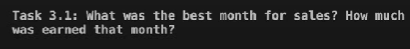

Phân tích bài toán :

ta thấy rằng doanh số tốt nhát sẽ là tông của 2 cột là sô lường đặt hàng nhân với giá tiên môt sảng phẩm trong tháng đó  

tống số đó ta sẽ có được doanh thu của thảng đó, sau đó so sanh với các tháng còn lại để xem tháng nào có doanh thu tốt nhất 



In [54]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


thấy rằng việt tính toán với 2 dự liệu có kiểu dữ liẹu là opject là không hợp  lý

chuyển sang kiểu dữ liệu số 

In [55]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [56]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [57]:
moving_column = df.pop('Sales')
df.insert(4, 'Sale', moving_column)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [58]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
sales_per_month = df.groupby('Month')['Sales'].sum()
best_month = sales_per_month.idxmax()
best_sales = sales_per_month.max()
print(f"Tháng có doanh số tốt nhất: {best_month}, Doanh thu: {best_sales}")

Tháng có doanh số tốt nhất: 12, Doanh thu: 4613443.5


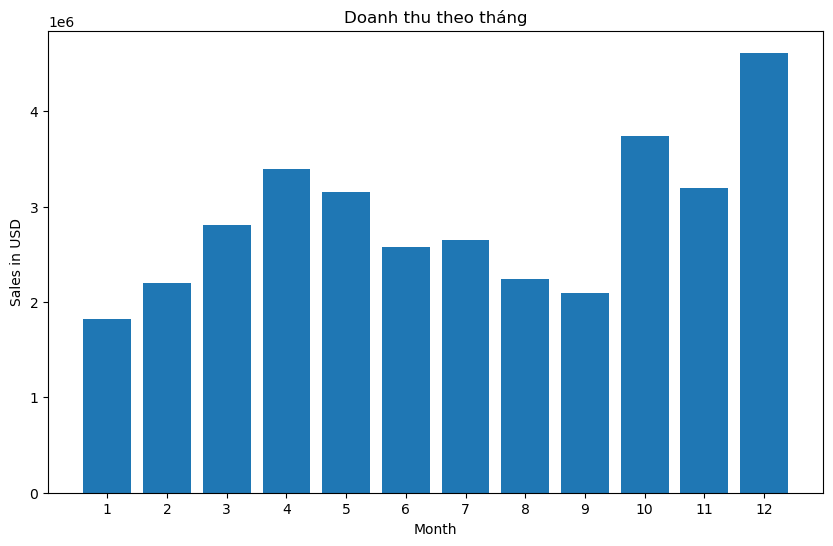

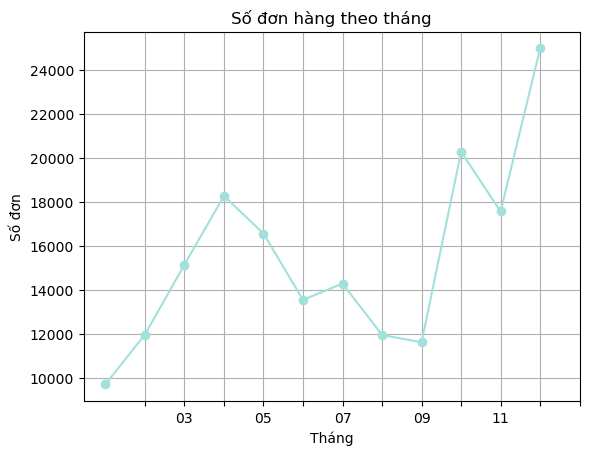

In [75]:
import matplotlib.pyplot as plt 
months = range(1,13)
plt.figure(figsize=(10, 6))
plt.bar(months, height = sales_per_month)
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')

plt.title('Doanh thu theo tháng')

plt.show()
monthly_orders = df['Month'].value_counts().sort_index()

# Vẽ đường trend
monthly_orders.plot(marker='o', color='#A2E1DB')
plt.title('Số đơn hàng theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Số đơn')
plt.xticks(range(1,13))
plt.grid()
plt.show()

Task 3.2  thành phố có doanh số bán hàng tốt nhất

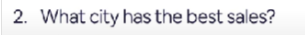

Phân tích bài toán cân lấy được tên của thàn phố  trong phần địa chỉ đặt hàng của từng đơn hàng
sau từ Sale từ câu Task 3.1 ta sẽ lấy  tỉnh tổng doanh thu của một thành phô rồi so sánh với các thành phố còn lại 

In [60]:
# Tạo cột 'City' bằng cách tách từ cột 'Purchase Address'
df['City'] = df['Purchase Address'].str.split(',').str[1].str.strip()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sale,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin


In [61]:
sales_per_city = df.groupby('City')['Sales'].sum()
best_city = sales_per_city.idxmax()
best_sales_city = sales_per_city.max()
print(f"Thành phố : {best_city} là thành phố có doanh thu lớn nhất, Doanh thu: {best_sales_city}")

Thành phố : San Francisco là thành phố có doanh thu lớn nhất, Doanh thu: 8262204.0


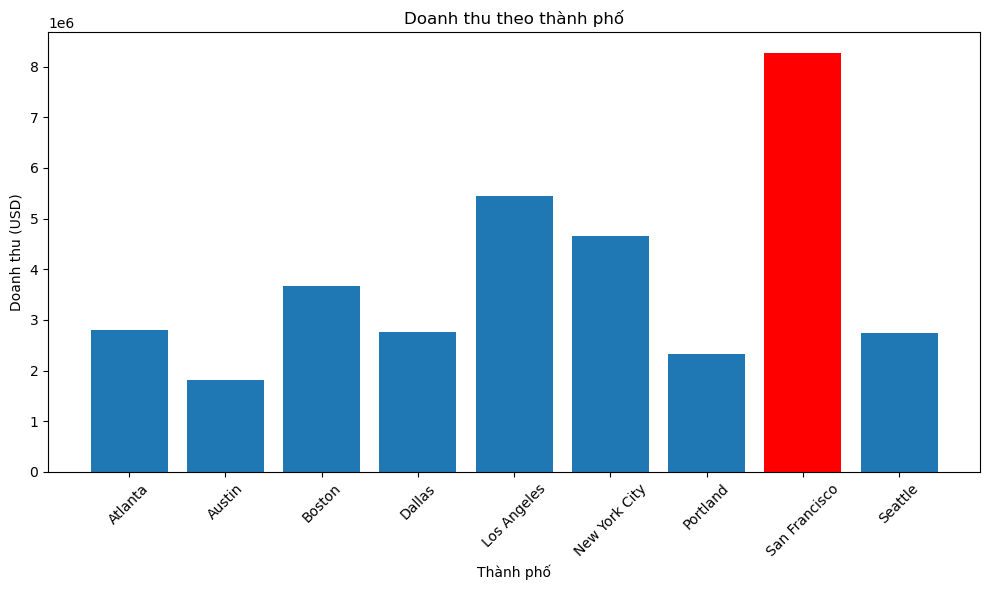

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(sales_per_city.index, sales_per_city.values)
plt.xticks(rotation=45)  
plt.xlabel('Thành phố')
plt.ylabel('Doanh thu (USD)')
plt.title('Doanh thu theo thành phố')

plt.bar(best_city, best_sales_city, color='red')

plt.tight_layout()
plt.show()

task 3.3 chúng tâ nên chạy quản cáo vào thời gian nào để tối đa hóa doanh thu 

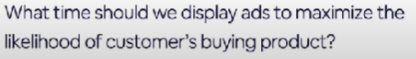

chuyển đổi orderdate thành date , tính doanh thu theo giờ , tính số đơn hàng  sau đó phân tích

C:\Users\asus\AppData\Local\Temp\ipykernel_18480\2587417892.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour


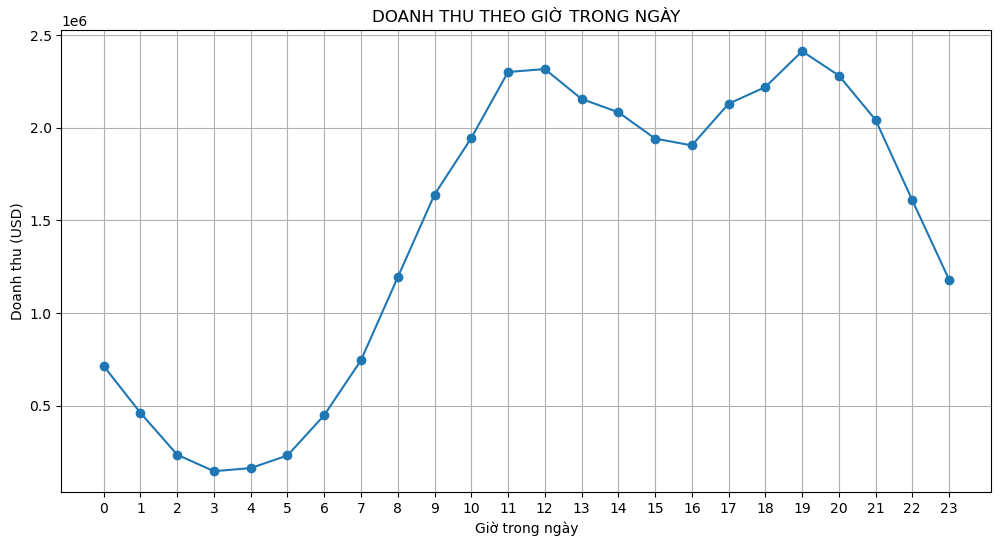

khung giờ mà có doanh số lớn nhấn là 19  với  2412938.5


In [63]:


df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour


hourly_sales = df.groupby('Hour')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o')
plt.xticks(range(24))
plt.xlabel('Giờ trong ngày')
plt.ylabel('Doanh thu (USD)')
plt.title('DOANH THU THEO GIỜ TRONG NGÀY')
plt.grid()
plt.show()
print ( "khung giờ mà có doanh số lớn nhấn là", hourly_sales.idxmax() ," với ", hourly_sales.max())

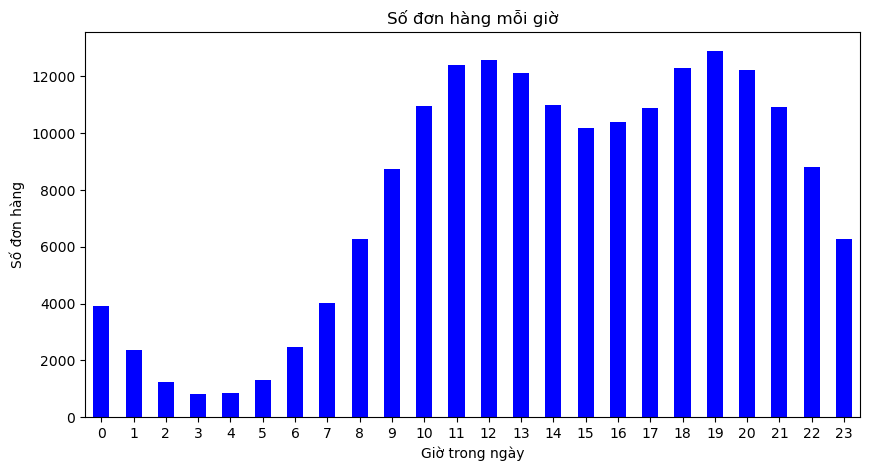


Giờ có nhiều đơn nhất là: 19 h với 12905 đơn hàng


In [64]:
orders_per_hour = df.groupby('Hour')['Order ID'].count()

# Bước 3: Vẽ biểu đồ đơn giản
plt.figure(figsize=(10,5))
orders_per_hour.plot(kind='bar', color='blue')

# Bước 4: Thêm tiêu đề và nhãn
plt.title('Số đơn hàng mỗi giờ')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=0)

plt.show()

# Bước 5: In ra giờ có nhiều đơn nhất
print("\nGiờ có nhiều đơn nhất là:", orders_per_hour.idxmax(), "h với", orders_per_hour.max(), "đơn hàng")

DỰA VÀO 2 BIỂU ĐỒ TA THẤY RẰNG  
- có 2 khung giờ mà đạt doanh thu cao nhất là 11h - 12h và 19h - 20h 
- khung giờ có nhiều đơn hàng nhât cũng tương tự 

KẾT LUẬN : CHÚNG TA NÊN CHẠY QUẢNG CÁO Ở 2 KHUNGG GIỜ NÀY ĐỂ TĂNG DOANH THU CHO DOANH NGHIỆPNGHIỆP

TASK 3.4 NHỮNG SẢN PHẨM NÀO THƯỜNG ĐƯỢC MUA CÙNG NHAU

 

 phân tích bài toán : đầu tiên cần tìm các đơn hàng có cùng order_id

In [65]:
import pandas as pd
from itertools import combinations
from collections import Counter

# 1. Nhóm các sản phẩm trong cùng đơn hàng
grouped = df.groupby('Order ID')['Product'].apply(list)

# 2. Lọc ra các đơn hàng có từ 2 sản phẩm trở lên
multi_product_orders = grouped[grouped.apply(len) >= 2]

# 3. Tìm tất cả các cặp sản phẩm trong mỗi đơn hàng
product_pairs = []
for products in multi_product_orders:
    # Tạo tất cả các cặp kết hợp 2 sản phẩm
    pairs = list(combinations(sorted(products), 2))
    product_pairs.extend(pairs)

# 4. Đếm tần suất xuất hiện của mỗi cặp
pair_counts = Counter(product_pairs)

# 5. Hiển thị 10 cặp phổ biến nhất
top_pairs = pair_counts.most_common(10)
for pair, count in top_pairs:
    print(f"{pair[0]} + {pair[1]}: {count} lần")

Lightning Charging Cable + iPhone: 1015 lần
Google Phone + USB-C Charging Cable: 999 lần
Wired Headphones + iPhone: 462 lần
Google Phone + Wired Headphones: 423 lần
Apple Airpods Headphones + iPhone: 373 lần
USB-C Charging Cable + Vareebadd Phone: 368 lần
Bose SoundSport Headphones + Google Phone: 228 lần
USB-C Charging Cable + Wired Headphones: 205 lần
Vareebadd Phone + Wired Headphones: 149 lần
Lightning Charging Cable + Wired Headphones: 129 lần


TASK 3.5 SẢN PHẨM NÀO ĐƯỢC BÁN NHIỀU NHẤT và SẢN PHẨM CÓ DOANH THU CAO NHẤTNHẤT

phân tích đề bài : sum(quantity) order by productproduct


Sản phẩm  Macbook Pro Laptop là sản phẩm có doanh thu cao nhất với  nhất với 8037600.0


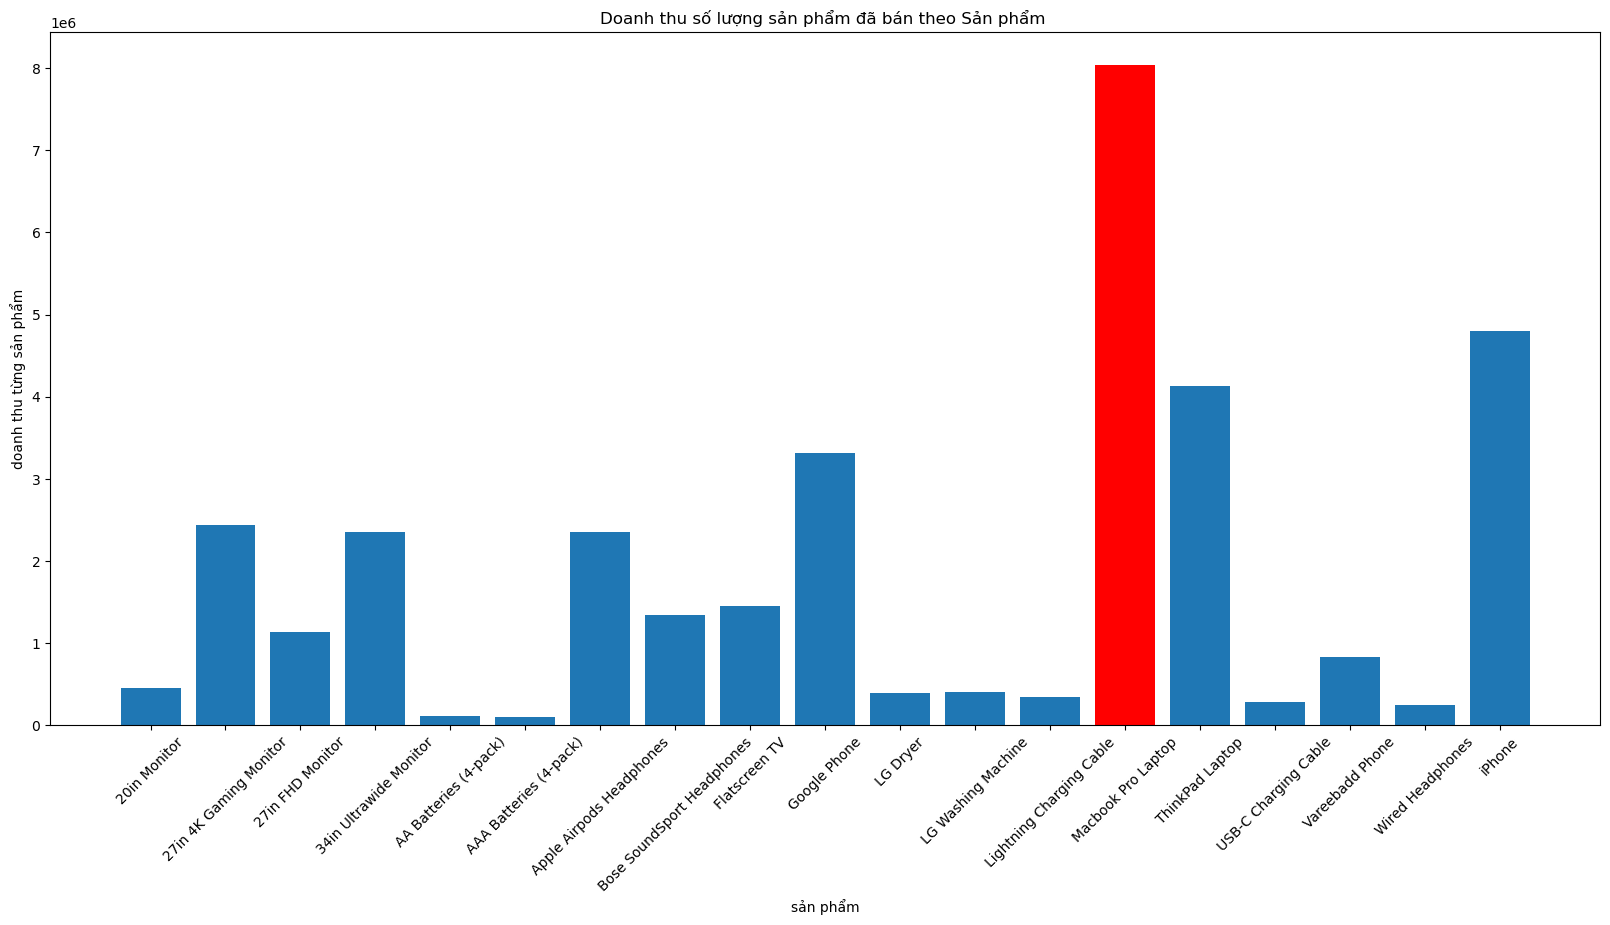

In [66]:

sales_by_product = df.groupby('Product')['Sales'].sum()
best_sales_product = sales_by_product.idxmax()
biggest_sales = sales_by_product.max()
plt.figure(figsize=(20, 9))
plt.bar(sales_by_product.index, sales_by_product.values)
plt.xticks(rotation=45)  
plt.xlabel('sản phẩm')
plt.ylabel('doanh thu từng sản phẩm')
plt.title('Doanh thu số lượng sản phẩm đã bán theo Sản phẩm ')
plt.bar(best_sales_product, biggest_sales, color='red')
print("Sản phẩm ", best_sales_product , "là sản phẩm có doanh thu cao nhất với  nhất với", biggest_sales)
#plt.tight_layout()
plt.show()

Sản phẩm  AAA Batteries (4-pack) là sản phẩm bán chạy nhất với 31017 sản phẩm được bán rara


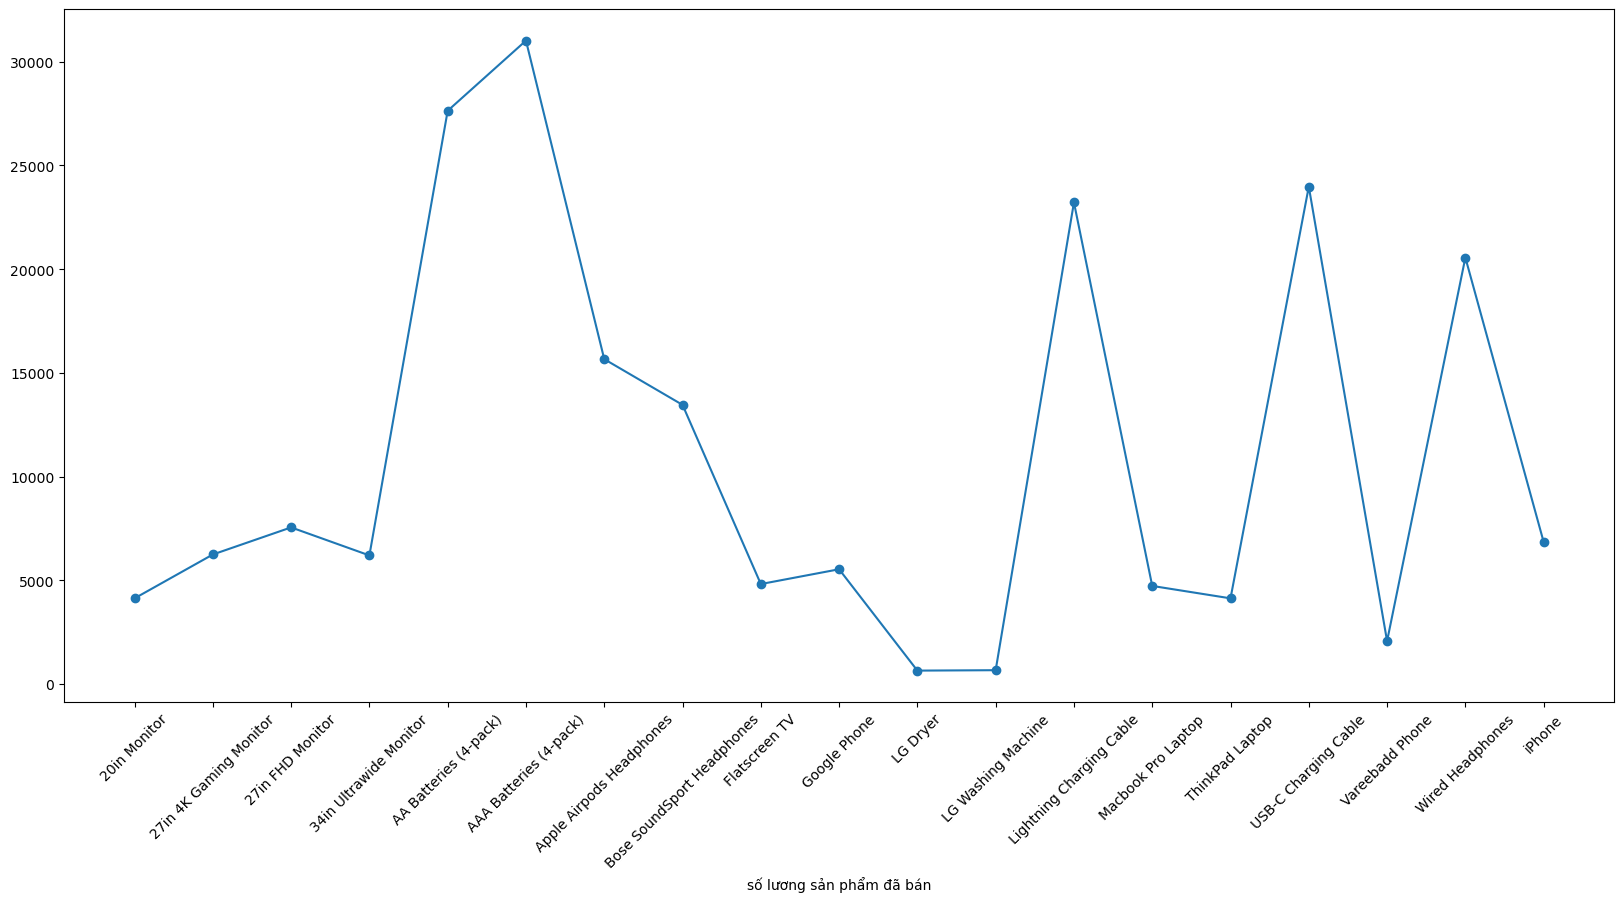

In [67]:
Number_of_products_sold = df.groupby('Product')['Quantity Ordered'].sum()
best_selling_product = Number_of_products_sold.idxmax()
best_product_sell = Number_of_products_sold.max()
print("Sản phẩm ", best_selling_product , "là sản phẩm bán chạy nhất với", best_product_sell , "sản phẩm được bán rara")
plt.figure(figsize=(20, 9))
plt.plot(Number_of_products_sold .index, Number_of_products_sold .values, marker='o')
plt.xticks(rotation=45)  
plt.xlabel('sản phẩm')
plt.xlabel('số lương sản phẩm đã bán')
#plt.grid()
plt.show()

TASK 3.6 Thành phố nào có doanh thu cao nhất/thấp nhất?

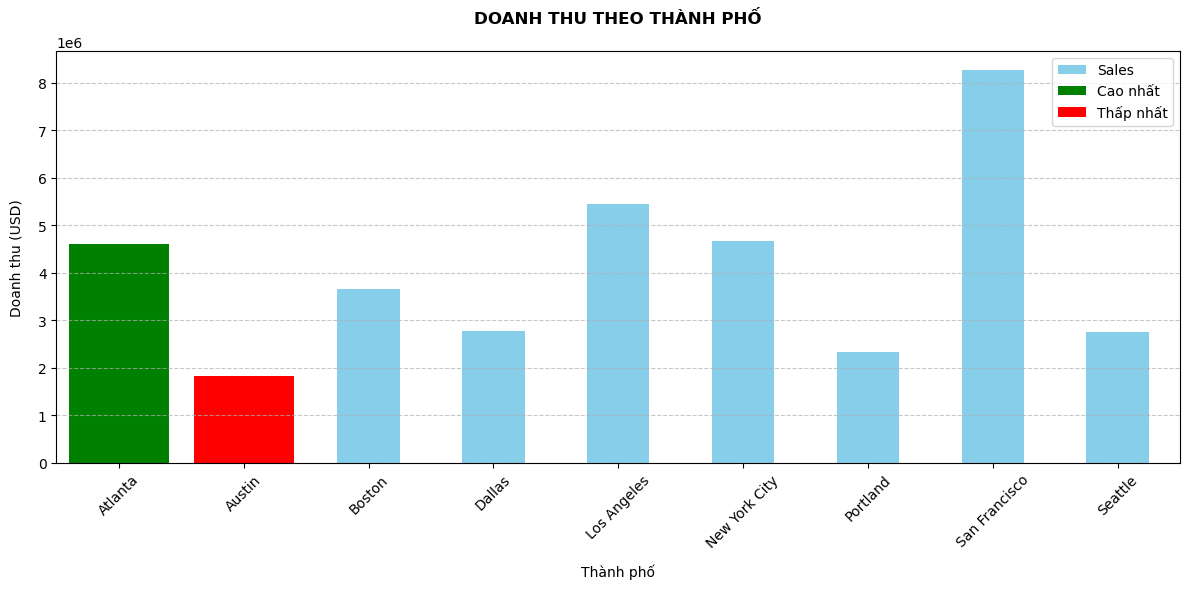

In [69]:
worst_city = sales_per_city.idxmin()
worst_sales = sales_per_city.min()
plt.figure(figsize=(12, 6))
sales_per_city.plot(kind='bar', color='skyblue')

# Highlight thành phố cao nhất/thấp nhất
plt.bar(best_city, best_sales, color='green', label='Cao nhất')
plt.bar(worst_city, worst_sales, color='red', label='Thấp nhất')

plt.title('DOANH THU THEO THÀNH PHỐ', fontweight='bold', pad=20)
plt.xlabel('Thành phố', labelpad=10)
plt.ylabel('Doanh thu (USD)', labelpad=10)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3.7 Tỷ lệ khách hàng quay lại mua hàng theo tháng như thế nào?

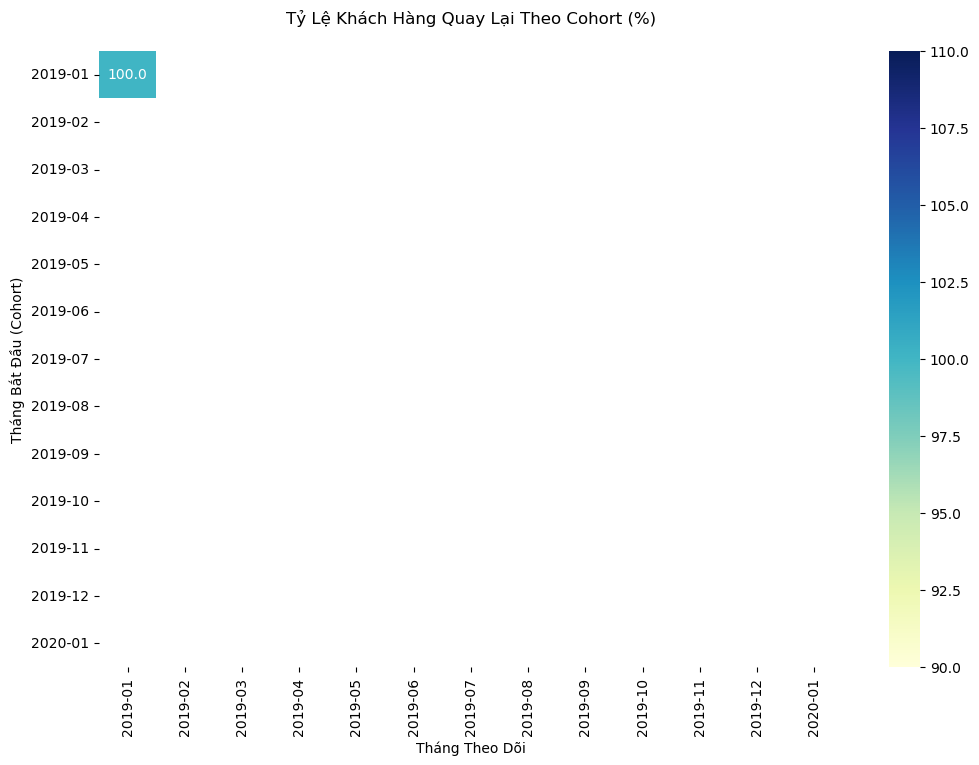

In [ ]:
import seaborn as sns


df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')  # Hoặc format phù hợp với dữ liệu của bạn
df['CohortMonth'] = df.groupby('Order ID')['Order Date'].transform('min').dt.to_period('M')
df['OrderMonth'] = df['Order Date'].dt.to_period('M')

cohort_data = df.groupby(['CohortMonth', 'OrderMonth'])['Order ID'].nunique().unstack()


retention_rate = cohort_data.divide(cohort_data.iloc[:, 0], axis=0) * 100

plt.figure(figsize=(12, 8))
sns.heatmap(retention_rate, 
           annot=True, 
           fmt='.1f', 
           cmap='YlGnBu',
           mask=retention_rate.isnull())

plt.title('Tỷ Lệ Khách Hàng Quay Lại Theo Cohort (%)', pad=20)
plt.ylabel('Tháng Bắt Đầu (Cohort)')
plt.xlabel('Tháng Theo Dõi')
plt.show()

Task 3.8 Tỉ lệ đơn hàng theo thành phố 

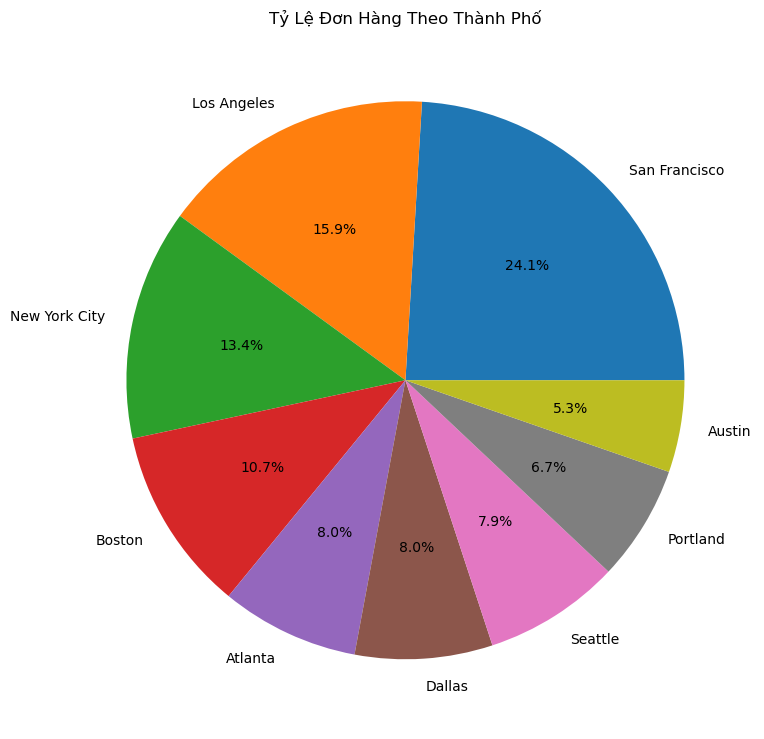

In [73]:
# Đếm số đơn hàng mỗi thành phố
city_orders = df['City'].value_counts(normalize=True) * 100

# Vẽ biểu đồ tròn đơn giản
city_orders.plot(kind='pie', autopct='%1.1f%%', figsize=(9,99))
plt.title('Tỷ Lệ Đơn Hàng Theo Thành Phố')
plt.ylabel('')
plt.show()

TASK 3.9 Các Sản phẩm ít người mua của mổi tháng


Sản phẩm bán ít nhất theo từng tháng:
- Tháng 01: LG Dryer (chỉ 39 đơn)
- Tháng 02: LG Dryer (chỉ 38 đơn)
- Tháng 03: LG Dryer (chỉ 49 đơn)
- Tháng 04: LG Washing Machine (chỉ 61 đơn)
- Tháng 05: LG Washing Machine (chỉ 64 đơn)
- Tháng 06: LG Dryer (chỉ 43 đơn)
- Tháng 07: LG Washing Machine (chỉ 52 đơn)
- Tháng 08: LG Dryer (chỉ 46 đơn)
- Tháng 09: LG Dryer (chỉ 30 đơn)
- Tháng 10: LG Dryer (chỉ 50 đơn)
- Tháng 11: LG Washing Machine (chỉ 53 đơn)
- Tháng 12: LG Washing Machine (chỉ 80 đơn)


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

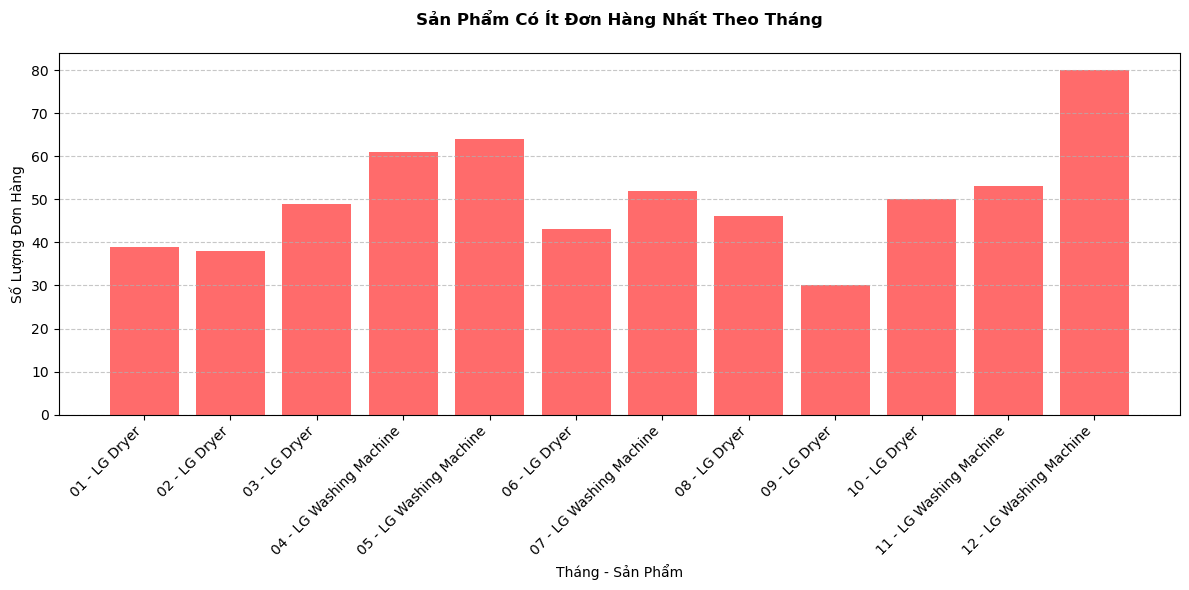

In [77]:
monthly_product_orders = df.groupby(['Month', 'Product'])['Order ID'].count().reset_index()
worst_selling_per_month = monthly_product_orders.loc[
    monthly_product_orders.groupby('Month')['Order ID'].idxmin()
]
print("Sản phẩm bán ít nhất theo từng tháng:")
for _, row in worst_selling_per_month.iterrows():
    print(f"- Tháng {row['Month']}: {row['Product']} (chỉ {row['Order ID']} đơn)")
    plt.figure(figsize=(12, 6))
plt.bar(
    worst_selling_per_month['Month'].astype(str) + " - " + worst_selling_per_month['Product'],
    worst_selling_per_month['Order ID'],
    color='#FF6B6B'
)
plt.title("Sản Phẩm Có Ít Đơn Hàng Nhất Theo Tháng", pad=20, fontweight='bold')
plt.xlabel("Tháng - Sản Phẩm")
plt.ylabel("Số Lượng Đơn Hàng")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()